In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
import numpy as np

In [2]:
df = pd.read_csv("../data/sierraleone-bumbuna.csv")
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [5]:
print("Showing columns with more than 5% missing values:")

sum_of_na = df.isna().sum()
na_in_percent = (sum_of_na / len(df)) * 100
five_percent = na_in_percent[na_in_percent > 5]
print(five_percent)

Showing columns with more than 5% missing values:
Comments    100.0
dtype: float64


In [3]:
print("Initialize key columns to clean")
columns = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

Initialize key columns to clean


In [4]:
print("Remove negative values and replace with NaN")

for col in columns:
    df[col] = df[col].where(
        df[col] >= 0, np.nan
    ) 

print(df[columns].head())

Remove negative values and replace with NaN
   GHI  DNI  DHI  ModA  ModB   WS  WSgust
0  NaN  NaN  NaN   0.0   0.0  0.0     0.0
1  NaN  NaN  NaN   0.0   0.0  0.0     0.0
2  NaN  NaN  NaN   0.0   0.0  0.0     0.0
3  NaN  0.0  NaN   0.0   0.0  0.0     0.0
4  NaN  NaN  NaN   0.0   0.0  0.0     0.0


In [5]:
print("Impute missing values with column mean")

for col in columns:
    mean = df[col].mean()
    df[col] = df[col].fillna(mean)

print(df[columns].head())

Impute missing values with column mean
          GHI         DNI         DHI  ModA  ModB   WS  WSgust
0  406.239777  236.240484  232.837959   0.0   0.0  0.0     0.0
1  406.239777  236.240484  232.837959   0.0   0.0  0.0     0.0
2  406.239777  236.240484  232.837959   0.0   0.0  0.0     0.0
3  406.239777    0.000000  232.837959   0.0   0.0  0.0     0.0
4  406.239777  236.240484  232.837959   0.0   0.0  0.0     0.0


In [7]:
print("Checking for Outliers using Z-Score and flagging them:")

columns = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
z_score = (df[columns] - df[columns].mean()) / df[columns].std()
df["is_outlier"] = (abs(z_score) > 3).any(axis=1)
print(df[["is_outlier"]].head())

Checking for Outliers using Z-Score and flagging them:
   is_outlier
0       False
1       False
2       False
3       False
4       False


In [8]:
print("Drop columns with more than 80% missing values")

df_clean = df.copy()
df_clean["Timestamp"] = pd.to_datetime(df_clean["Timestamp"], errors="coerce")
all_columns = list(df_clean.columns)

for col in all_columns:
    na_percentage = (df_clean[col].isna().sum() / len(df)) * 100

    if na_percentage > 80:
        df_clean.drop(columns=[col], inplace=True)

df_clean.isna().sum()

df_clean.to_csv("../data/sierraleone_clean.csv", index=False)

Drop columns with more than 80% missing values


Line Chart of GHI, DNI, DHI, Tamb over Time


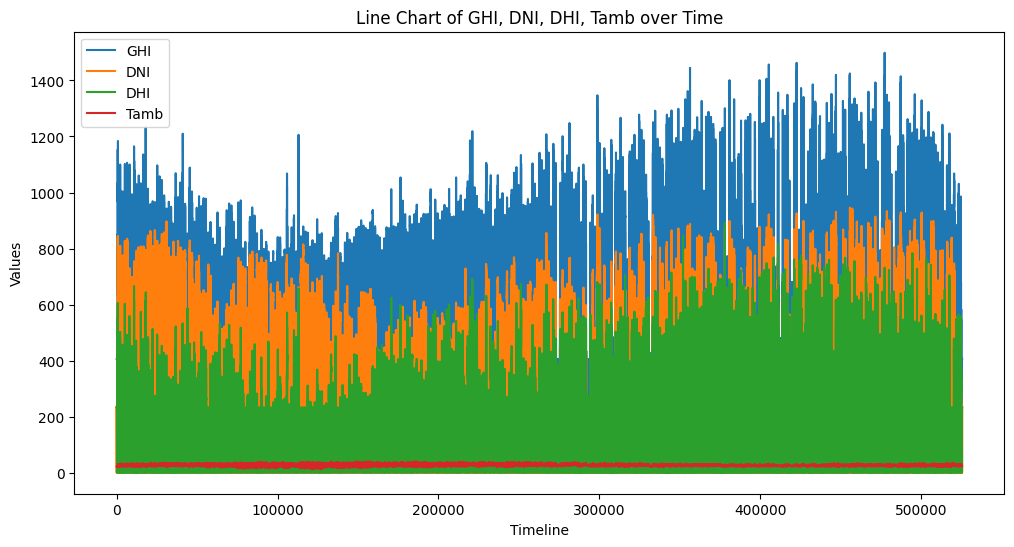

In [9]:
print("Line Chart of GHI, DNI, DHI, Tamb over Time")

columns_to_plot = ["GHI", "DNI", "DHI", "Tamb"]
df_clean[columns_to_plot].plot(figsize=(12, 6))
plt.xlabel("Timeline")
plt.ylabel("Values")
plt.title("Line Chart of GHI, DNI, DHI, Tamb over Time")
plt.legend(columns_to_plot)
plt.show()

Bar Chart of Average ModA & ModB Pre/Post Cleaning
                  ModA        ModB
is_outlier                        
False       187.760745  179.744595
True        724.600871  702.020939


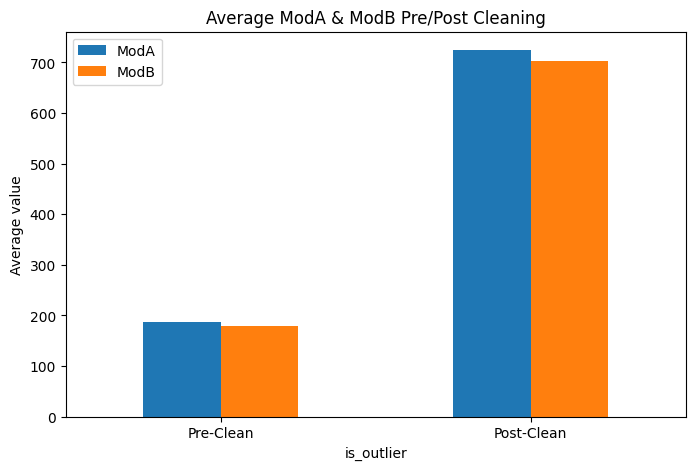

In [10]:
print("Bar Chart of Average ModA & ModB Pre/Post Cleaning")

grouped = df_clean.groupby("is_outlier")[["ModA", "ModB"]].mean()
print(grouped)
grouped.plot(kind="bar", figsize=(8, 5))
plt.ylabel("Average value")
plt.title(
    "Average ModA & ModB Pre/Post Cleaning"
)  # Pre clean is False , Post clean is True
plt.xticks([0, 1], ["Pre-Clean", "Post-Clean"], rotation=0)
plt.show()

Heatmap of Correlation


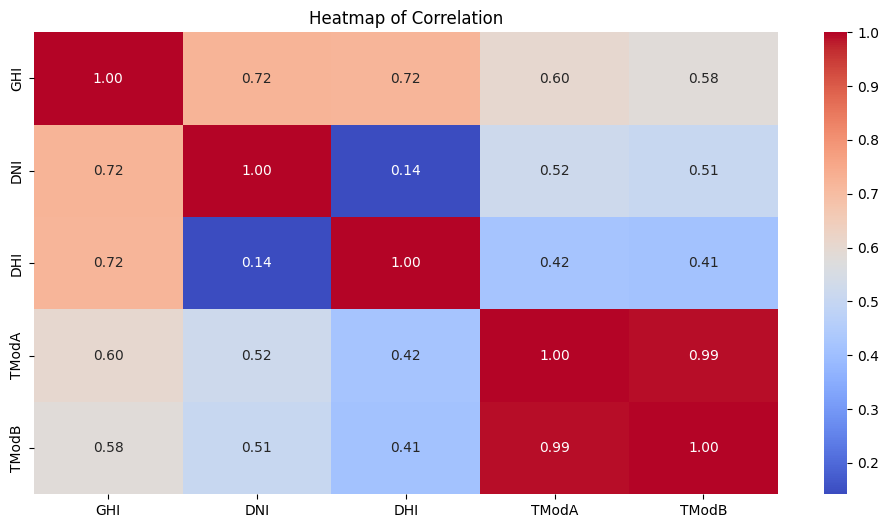

In [11]:
print("Heatmap of Correlation")
columns_to_plot = ["GHI", "DNI", "DHI", "TModA", "TModB"]

corr_matrix = df_clean[columns_to_plot].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Correlation")
plt.show()

Scatter Plot of WS, WSgust, WD vs GHI


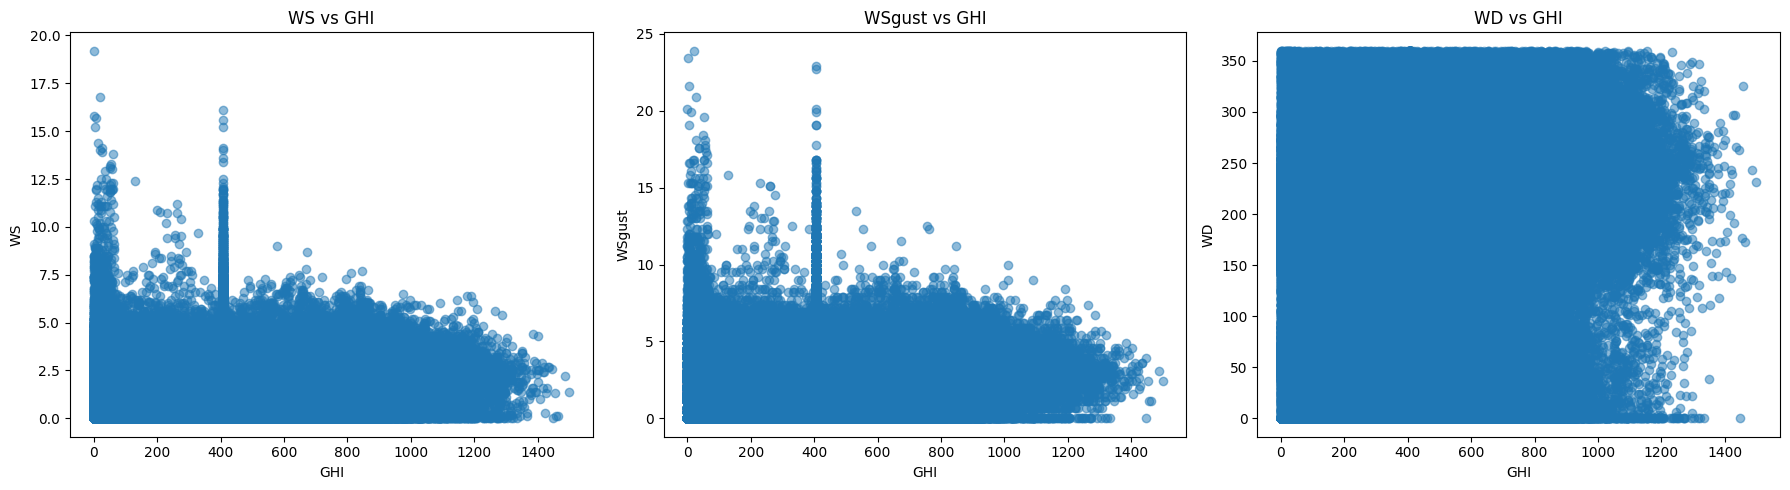

In [12]:
print("Scatter Plot of WS, WSgust, WD vs GHI")
columns_to_plot = ["WS", "WSgust", "WD"]
target = "GHI"

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))  # 1 row, 3 columns

for i, col in enumerate(columns_to_plot):
    axes[i].scatter(df_clean[target], df_clean[col], alpha=0.5)
    axes[i].set_xlabel(target)
    axes[i].set_ylabel(col)
    axes[i].set_title(f"{col} vs {target}")

plt.tight_layout()
plt.show()

Scatter Plot of RH vs GHI


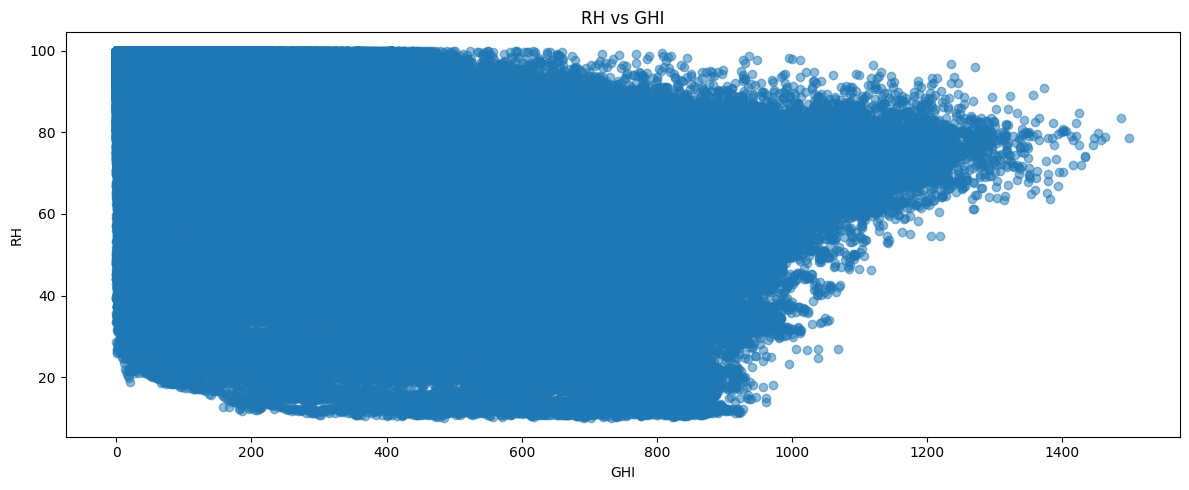

In [13]:
print("Scatter Plot of RH vs GHI")

columns_to_plot = ["RH"]
target = "GHI"

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

for i, col in enumerate(columns_to_plot):
    axes.scatter(df_clean[target], df_clean[col], alpha=0.5)
    axes.set_xlabel(target)
    axes.set_ylabel(col)
    axes.set_title(f"{col} vs {target}")

plt.tight_layout()
plt.show()

Wind Speed and Wind Direction plot


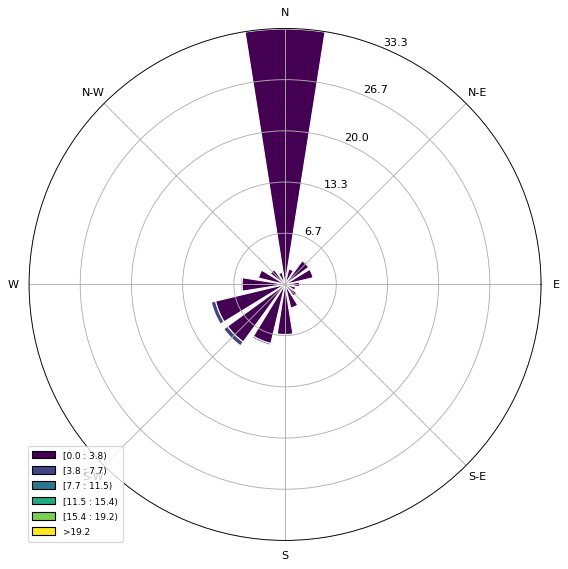

In [14]:
print("Wind Speed and Wind Direction plot")

ax = WindroseAxes.from_ax()
ax.bar(df["WD"], df["WS"], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()
plt.show()

Histogram of GHI and DNI


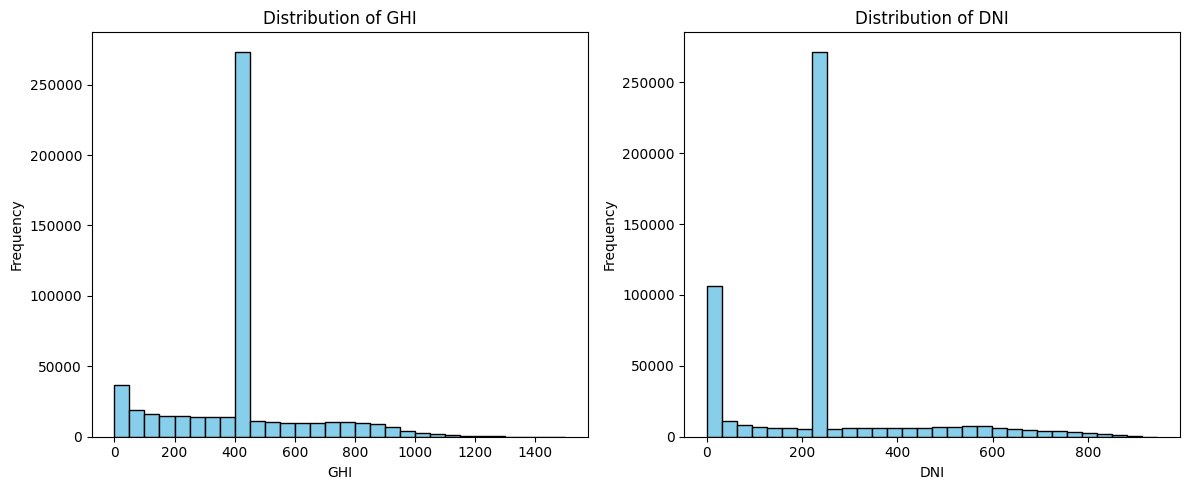

In [15]:
print("Histogram of GHI and DNI")

columns_to_plot = ["GHI", "DNI"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, col in enumerate(columns_to_plot):
    axes[i].hist(df_clean[col].dropna(), bins=30, color="skyblue", edgecolor="black")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Temperature Analysis


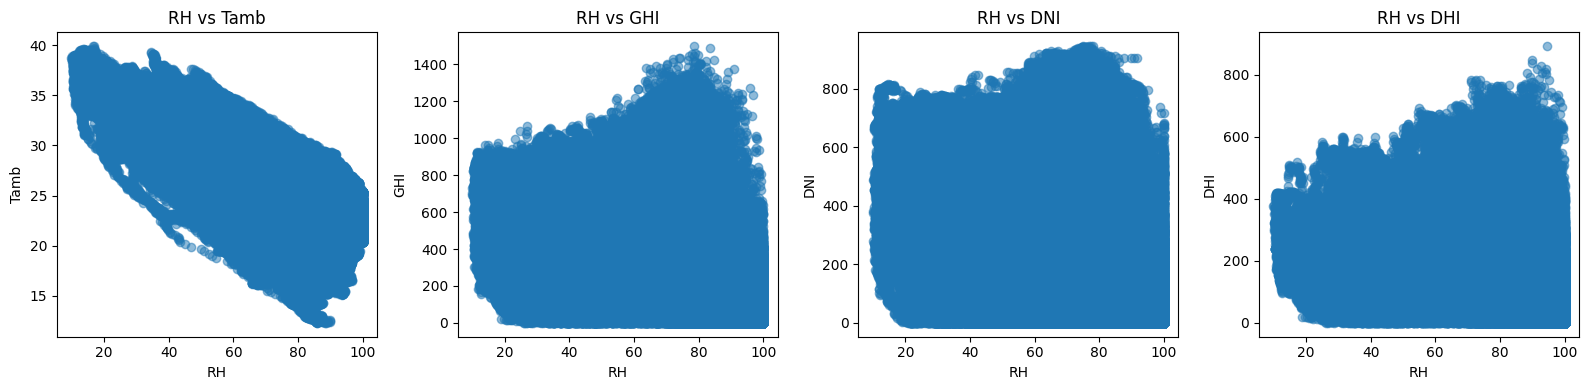

In [16]:
print("Temperature Analysis")

variables = ["Tamb", "GHI", "DNI", "DHI"]

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, var in enumerate(variables):
    axes[i].scatter(df_clean["RH"], df_clean[var], alpha=0.5)
    axes[i].set_xlabel("RH")
    axes[i].set_ylabel(var)
    axes[i].set_title(f"RH vs {var}")

plt.tight_layout()
plt.show()

Bubble Chart of GHI vs Tamb with RH as bubble size


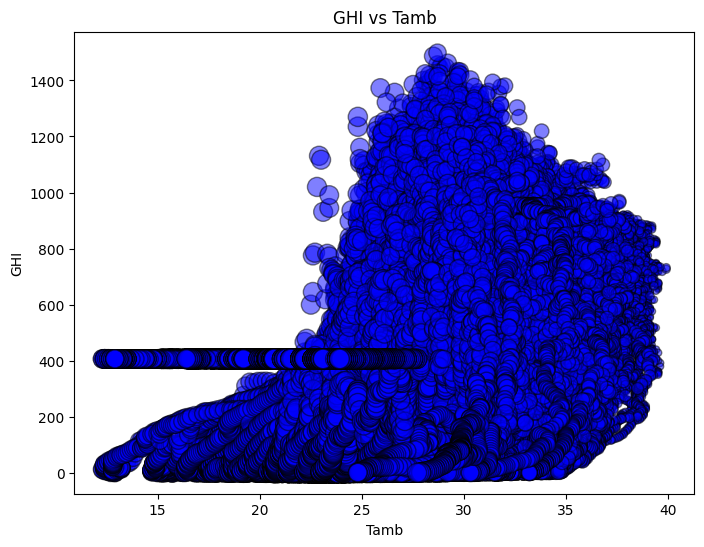

In [17]:
print("Bubble Chart of GHI vs Tamb with RH as bubble size")

plt.figure(figsize=(8, 6))
plt.scatter(
    df["Tamb"],
    df["GHI"],
    s=df["RH"] * 2,
    alpha=0.5,
    c="blue",
    edgecolor="k",
)
plt.xlabel("Tamb")
plt.ylabel("GHI")
plt.title("GHI vs Tamb")
plt.show()